# Portfolio Optimization

**Portfolio**: A portfolio is a collection of financial instruments like stocks, bonds, commodities, cash and cash equivalents , as well as their fund counterparts. [Investopedia]

**Returns**: It refers to the gain or loss on our asset/portfolio over a fixed time frame. In this analysis, we make a return as the percentage change in the closing price of the asset over the previous day’s closing price. We will compute the returns using .pct_change() function in python. #https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/

**Portfolio optimization**: The process of creating a portfolio of assets, for which your investment has the maximum return and minimum risk.

But how do we decide out of an infinite possible combinations for portfolios, the one which is optimum?

**Modern Portfolio Theory**, or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level.

* It was formulated by H. Markowitz and while it is not the only optimization technique known, it is the most widely used.

* MPT assumes that all investors are risk-averse, i.e, if there is a choice between low risk and high risk portfolios with the same returns, an investor will choose one with the low risk.

Specifically, given the historical data of $n$ stocks:
* $\tilde{r}_i$: Reward from stock $i$ (random variable)
* $\mu_i = {\rm E}(\tilde{r}_i)$: expected reward from stock $i$
* ${\rm Var}(\tilde{r}_i):$ variance in reward from stock $i$
* $\sigma_{ij} = {\rm E}((\tilde{r}_i - \mu_i)(\tilde{r}_j - \mu_j)) = {\rm  Cov}(\tilde{r}_i,\tilde{r}_j)$. Note that $\sigma_{ii} = {\rm Var}(\tilde{r}_i):$
* Budget $B$, target $\beta$ on expected portfolio reward

we want to decide the amount to invest in stock $i$---denoted as $x_i$---to minimize total portfolio variance so that:
* expected reward of total portfolio is above target β
* total amount invested stay within our budget

(Note that we do not consider short sales here)

We can formulate the portfolio problem as follows:

$$
\begin{align}
\min\ & \boldsymbol{x}^\top \boldsymbol{\Sigma} \boldsymbol{x}\\
\mbox{s.t.}\ & \boldsymbol{\mu}^\top \boldsymbol{x} \geq \beta\\
&\boldsymbol{1}^\top \boldsymbol{x} \leq B\\
&\boldsymbol{x} \leq \boldsymbol{1}\\
&\boldsymbol{x} \geq \boldsymbol{0}
\end{align}
$$

Now please try to obtain the parameters in the model from real stock data and solve the model by using RSOME.

In [1]:
import pandas as pd
import numpy as np
import pickle
import folium
from folium.plugins import BeautifyIcon
import matplotlib.pyplot as plt

import rsome as rso
from rsome import ro
from rsome import grb_solver as grb

### Step 1 Pull the stock price data from yahoo finance

The first step is to is to pull the required data from a verified site such as Yahoo or Quandl. The example below uses Yahoo and the dates for which we will be pulling the data is from 1st January, 2010 to 31st December, 2019. Note that we only use the closing price `"Adj Close"`.

In [2]:
#https://amangupta16.medium.com/portfolio-optimization-using-python-part-1-2-9fd80097a606
# Creating a list of Stock Tickers
from pandas_datareader import data as wb
stocks = ['HSBC','JPM','AAPL','WMT','AMZN','MSFT']
price_data = pd.DataFrame()
# Pulling closing price   
for stock in stocks:
    price_data[stock] = wb.DataReader(stock, data_source = 'yahoo', start = '2010-1-1', end = '2019-12-31')['Adj Close']
num_stocks = len(stocks)

In [3]:
price_data

,HSBC,JPM,AAPL,WMT,AMZN,MSFT
Date,,,,,,
2009-12-31,30.848900,30.619137,6.444380,40.166721,134.520004,23.493389
2010-01-04,31.513542,31.524031,6.544689,40.752876,133.899994,23.855656
2010-01-05,32.016068,32.134651,6.556003,40.347069,134.690002,23.863365
2010-01-06,32.053886,32.311207,6.451721,40.256889,132.250000,23.716919
2010-01-07,31.951227,32.951267,6.439795,40.279438,130.000000,23.470264
...,...,...,...,...,...,...
2019-12-24,35.171291,128.735016,69.938210,115.707703,1789.209961,154.117050
2019-12-26,35.380371,130.101151,71.325798,115.717377,1868.770020,155.380295
2019-12-27,35.453098,130.194717,71.298737,115.785141,1869.800049,155.664307


Plotting normalized returns to have a visualization of the data

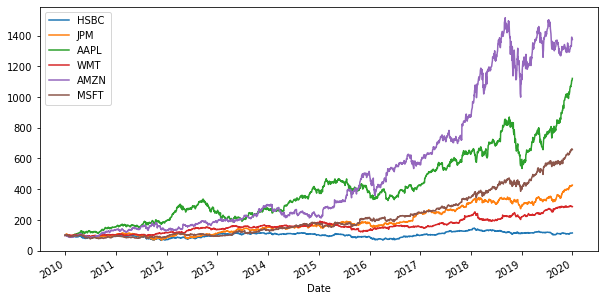

In [4]:
(price_data / price_data.iloc[0] * 100).plot(figsize=(10, 5))
plt.show()

What if we set different target $\beta$, for example, $\beta \in \{0.001, 0.002, 0.003, \ldots, 0.500\}$?